In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
datos = pd.read_csv('./posicion_salarios.csv',sep=';')
datos

,Posistion,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultatnt,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
datos = datos[['Level','Salary']]
datos.corr()

,Level,Salary
Level,1.000000,0.817949
Salary,0.817949,1.000000


In [5]:
nivelX = datos.filter(items=['Level'])
salarioY = datos.filter(items=['Salary'])

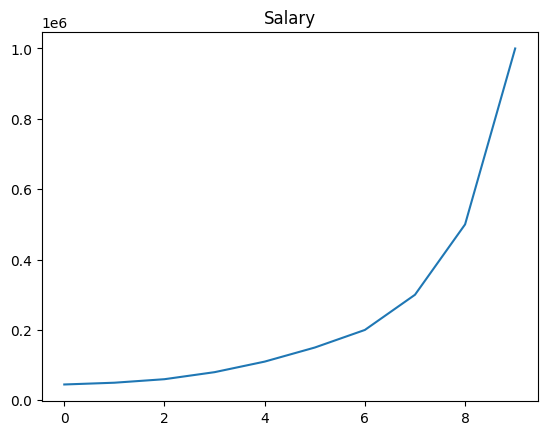

In [6]:
plt.plot(salarioY)
plt.title('Salary');

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [8]:
x_train, x_test = train_test_split(nivelX,test_size=0.2,random_state=42)
y_train, y_test = train_test_split(salarioY,test_size=0.2,random_state=42)

In [9]:
lr_poly = LinearRegression()
poly_reg = PolynomialFeatures(degree=4)
x_poly = poly_reg.fit_transform(x_train)
y_poly = poly_reg.fit_transform(salarioY)

In [10]:
x_poly

array([[1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03]])

In [11]:
lr_poly.fit(x_poly,y_train)
y_pred = lr_poly.predict(poly_reg.fit_transform(nivelX))
y_pred

array([[ 45986.39474919],
       [ 27337.43608784],
       [ 52614.08306226],
       [ 87298.10162491],
       [116229.08013837],
       [143604.4293754 ],
       [192979.38251888],
       [307266.99516185],
       [548738.14530749],
       [999021.53336915]])

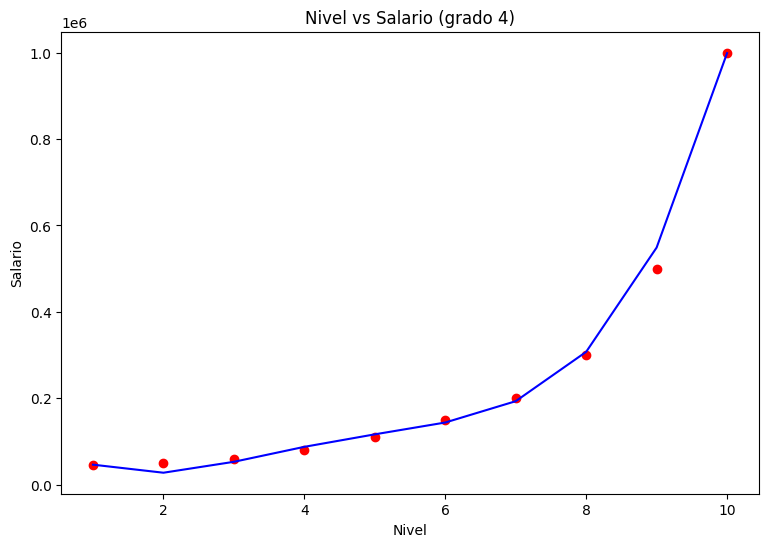

In [17]:
plt.figure(figsize=(9,6))
plt.scatter(nivelX,salarioY,color='red')
plt.plot(nivelX,y_pred,color='blue')
plt.title('Nivel vs Salario (grado 4)')
plt.xlabel('Nivel')
plt.ylabel('Salario');

In [16]:
print(r2_score(salarioY,y_pred))

0.996056958378352
